In [4]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

1.8062813296373292 106.76953366672052
36.5940084428903 -42.568273362554095
8.517561347749165 146.80742401330207
1.214801156399318 146.17446058259776
-8.234759217129351 -43.74864557609445
-22.070352989924046 105.08442584840805
77.24843496580013 -142.85323246295738
10.291391065695805 95.29503664038174
-10.690495624769639 84.88187460070554
23.14055557932369 -54.5527929620572
-5.7398580809082205 175.23410184582343
-58.74854457465599 -32.13902461862912
40.08424975666415 16.339989364652013
-43.24228195464211 -73.79799047044263
-77.94063860744126 -3.310145648551895
-57.988437022434134 -81.06690813925462
85.16106780509699 4.332589283405525
59.70485999870519 -158.6268513520443
57.61418408635373 49.770474559228575
-82.61788042618697 -16.035009955103305
46.73913107399841 -46.31366979318756
-5.631872771293857 86.6955356545779
-6.677160529540814 -107.97837499403055
-81.98854679338427 -82.11070731129752
-58.53117406837637 -174.8256635880992
-83.16042625986378 83.38283663578972
78.32739967535562 -170

47.14701917864821 149.47811187805115
-20.96422081907002 10.767907035337714
73.2955377902737 62.549652472051406
36.454323274235435 -130.32713187373065
-15.037198494874787 104.32151277338431
-78.97288256982777 -12.119165778340118
53.679711684854766 131.29999562794552
30.887200931029525 -52.514647554465114
-57.19996959533594 113.04137250745981
-65.94971381492944 -177.43962654930306
-34.435393175912935 -133.123458499489
27.450041982159277 116.25678909220937
60.43389230771817 -147.9140958193101
-7.6291437188406235 -76.48606946202189
-28.98413659945136 -28.979967619070862
58.66055021975609 -32.20284580324159
31.177016860481146 -110.93515780630656
3.0801125602906154 -30.57633698950454
55.301965043895166 -152.427969653275
26.100947448513693 -56.37782901801587
32.0323404333015 177.6066948538417
16.56433616511997 142.1062594501533
45.20048563438942 -25.408377040653562
-30.736623090998094 24.620714926425592
20.513031222653552 81.8716036257631
-65.3436594211226 -137.7251020322518
-10.5101390925655

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities. 
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
# don't print url b/c will contain personal API number to openweather account 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pemangkat
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | canto do buriti
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | lolua
City not found. Skipping...
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | trebisacce
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | nolinsk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | hambantota
Processi

Processing Record 35 of Set 4 | kirkenaer
Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | abbeville
Processing Record 38 of Set 4 | faya
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | malpur
Processing Record 41 of Set 4 | chulman
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | kerki
City not found. Skipping...
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | zaraza
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | warrnambool
Processing Record 49 of Set 4 | san francisco
Processing Record 50 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | kerema
Processing Record 2 of Set 5 | oxapampa
Processing Record 3 of Set 5 | qazigund
Processing Record 4 of Set 5 | qujing
Processing Record 5 of Set 5 | north platte
Processing Record 6 of Set 5 | musoma
Processing Record 7 of Set 5 | tasiilaq
Proces

Processing Record 26 of Set 8 | benghazi
Processing Record 27 of Set 8 | pundaguitan
Processing Record 28 of Set 8 | keetmanshoop
Processing Record 29 of Set 8 | saskylakh
Processing Record 30 of Set 8 | ulaanbaatar
Processing Record 31 of Set 8 | pecos
Processing Record 32 of Set 8 | maryborough
Processing Record 33 of Set 8 | cayenne
Processing Record 34 of Set 8 | tamala
Processing Record 35 of Set 8 | rocha
Processing Record 36 of Set 8 | scalloway
City not found. Skipping...
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | ardassa
Processing Record 39 of Set 8 | ji-parana
City not found. Skipping...
Processing Record 40 of Set 8 | bertoua
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | richards bay
Processing Record 44 of Set 8 | kochi
Processing Record 45 of Set 8 | erenhot
Processing Record 46 of Set 8 | bumba
Processing Record 47 of Set 8 | port elizabeth
Processing Record 48 of Se

Processing Record 13 of Set 12 | pontivy
Processing Record 14 of Set 12 | pizarro
Processing Record 15 of Set 12 | el bagre
Processing Record 16 of Set 12 | goderich
Processing Record 17 of Set 12 | bajil
Processing Record 18 of Set 12 | biak
Processing Record 19 of Set 12 | la rochelle
Processing Record 20 of Set 12 | nabire
Processing Record 21 of Set 12 | sao felix do xingu
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | peace river
Processing Record 24 of Set 12 | chuka
Processing Record 25 of Set 12 | artyk
City not found. Skipping...
Processing Record 26 of Set 12 | oranjestad
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | sur
Processing Record 29 of Set 12 | falakata
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | chara
Processing Record 32 of Set 12 | bengkulu
Processing Record 33 of Set 12 | mosquera
Processing Record 34 of Set 12 | tawang
Processing Record 35 of Set 12 | troitskoye
Processing 

In [14]:
len(city_data)

550

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pemangkat,1.1667,108.9667,79.99,79,100,4.03,ID,2022-07-13 01:00:07
1,Ribeira Grande,38.5167,-28.7000,70.23,91,96,8.70,PT,2022-07-13 01:00:07
2,Lorengau,-2.0226,147.2712,85.01,70,28,9.86,PG,2022-07-13 01:00:08
3,Canto Do Buriti,-8.1100,-42.9444,75.31,45,14,4.59,BR,2022-07-13 01:00:08
4,Carnarvon,-24.8667,113.6333,68.70,65,6,8.75,AU,2022-07-13 01:00:09
5,Aklavik,68.2191,-135.0107,56.28,55,52,16.02,CA,2022-07-13 01:00:09
6,Port Blair,11.6667,92.7500,82.02,82,100,19.82,IN,2022-07-13 01:00:10
7,Hithadhoo,-0.6000,73.0833,83.41,72,17,13.62,MV,2022-07-13 01:00:10
8,Codrington,-38.2667,141.9667,54.01,61,36,12.19,AU,2022-07-13 01:00:11
9,Mar Del Plata,-38.0023,-57.5575,47.08,70,0,16.11,AR,2022-07-13 00:58:19


In [16]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pemangkat,ID,2022-07-13 01:00:07,1.1667,108.9667,79.99,79,100,4.03
1,Ribeira Grande,PT,2022-07-13 01:00:07,38.5167,-28.7000,70.23,91,96,8.70
2,Lorengau,PG,2022-07-13 01:00:08,-2.0226,147.2712,85.01,70,28,9.86
3,Canto Do Buriti,BR,2022-07-13 01:00:08,-8.1100,-42.9444,75.31,45,14,4.59
4,Carnarvon,AU,2022-07-13 01:00:09,-24.8667,113.6333,68.70,65,6,8.75
5,Aklavik,CA,2022-07-13 01:00:09,68.2191,-135.0107,56.28,55,52,16.02
6,Port Blair,IN,2022-07-13 01:00:10,11.6667,92.7500,82.02,82,100,19.82
7,Hithadhoo,MV,2022-07-13 01:00:10,-0.6000,73.0833,83.41,72,17,13.62
8,Codrington,AU,2022-07-13 01:00:11,-38.2667,141.9667,54.01,61,36,12.19
9,Mar Del Plata,AR,2022-07-13 00:58:19,-38.0023,-57.5575,47.08,70,0,16.11


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
import pandas as pd 

In [7]:
file_to_load = pd.read_csv("weather_data/cities.csv")

city_data_df = pd.DataFrame(file_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Pemangkat,ID,2022-07-13 01:00:07,1.1667,108.9667,79.99,79,100,4.03
1,1,Ribeira Grande,PT,2022-07-13 01:00:07,38.5167,-28.7000,70.23,91,96,8.70
2,2,Lorengau,PG,2022-07-13 01:00:08,-2.0226,147.2712,85.01,70,28,9.86
3,3,Canto Do Buriti,BR,2022-07-13 01:00:08,-8.1100,-42.9444,75.31,45,14,4.59
4,4,Carnarvon,AU,2022-07-13 01:00:09,-24.8667,113.6333,68.70,65,6,8.75
...,...,...,...,...,...,...,...,...,...,...
545,545,Marzuq,YE,2022-07-13 01:15:25,14.4000,46.4667,77.54,40,100,2.13
546,546,Taksimo,RU,2022-07-13 01:15:25,56.3444,114.8794,62.19,89,100,2.77
547,547,Sisimiut,GL,2022-07-13 01:15:26,66.9395,-53.6735,42.66,93,99,3.71
548,548,Okhotsk,RU,2022-07-13 01:16:26,59.3833,143.3000,59.38,94,100,7.54


In [9]:
# Extract relevant fields from the Dataframe for plotting. 

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# import magic command so can create plot 
%matplotlib inline 

# Import time module 
import time 
import matplotlib.pyplot as plt 
import numpy as np


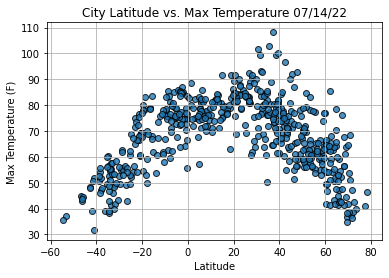

In [28]:
# Build scatter plot for latitude vs. max temperature 

plt.scatter(x=lats, y=max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.grid(True)
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

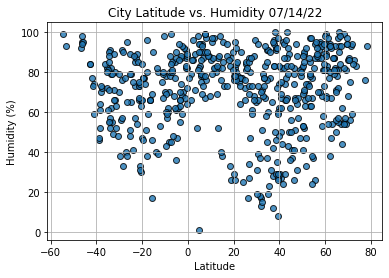

In [37]:
# latitude vs humidity 
plt.scatter(x=lats, y=humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.grid(True)
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()



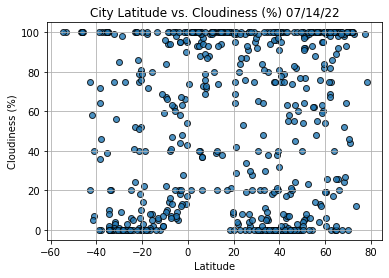

In [38]:
# latitude vs cloudiness 
plt.scatter(x=lats, y=cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

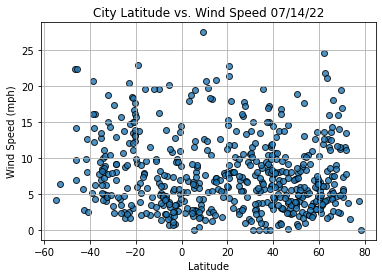

In [39]:
# latitude vs wind speed 
plt.scatter(x=lats, y=wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.grid(True)
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# apply loc method to city_data_df to get specific row 
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                 Punta Arenas
Country                        CL
Date          2022-07-13 01:00:14
Lat                        -53.15
Lng                      -70.9167
Max Temp                    37.11
Humidity                       93
Cloudiness                    100
Wind Speed                    6.4
Name: 13, dtype: object

In [42]:
# filter dataframe based on the value of a row 
city_data_df["Lat"] >= 0 

0       True
1       True
2      False
3      False
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [44]:
# if want to return dataframe with all data fitting the criteria, for latitudes >= 0 
# can use loc method on city_data_df
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Pemangkat,ID,2022-07-13 01:00:07,1.1667,108.9667,79.99,79,100,4.03
1,1,Ribeira Grande,PT,2022-07-13 01:00:07,38.5167,-28.7000,70.23,91,96,8.70
5,5,Aklavik,CA,2022-07-13 01:00:09,68.2191,-135.0107,56.28,55,52,16.02
6,6,Port Blair,IN,2022-07-13 01:00:10,11.6667,92.7500,82.02,82,100,19.82
10,10,Trebisacce,IT,2022-07-13 01:00:12,39.8708,16.5312,66.34,74,81,7.76


In [45]:
# assign this DataFrame to the variable northern_hemi_df and southern_hemi_df
# to access the data to perform linear regression.
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

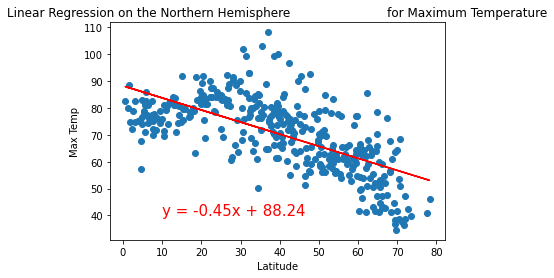

In [52]:
# Call the plot_linear_regression function with the x and y values, and edit the title, 
# y_label, and text_coordinates for the maximum temperature scatter plot.
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column 
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

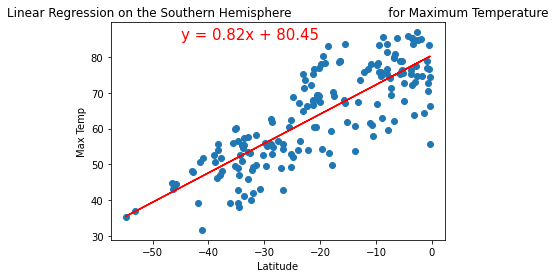

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-45,85))

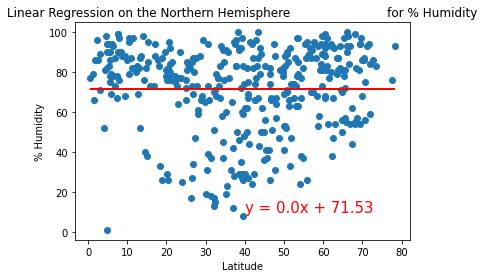

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

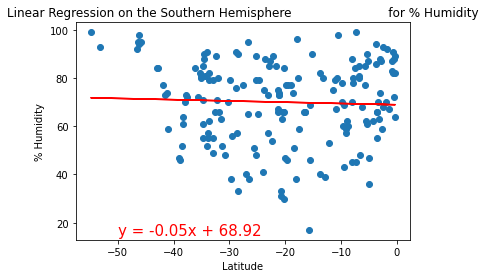

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

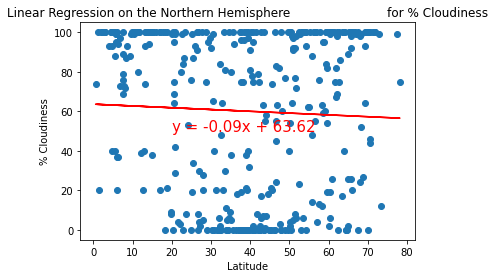

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,50))

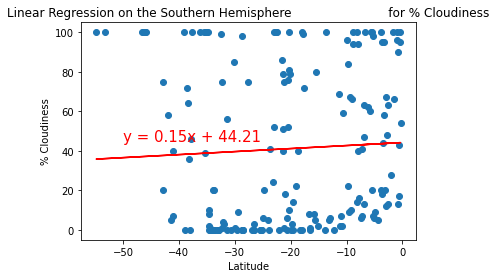

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,45))

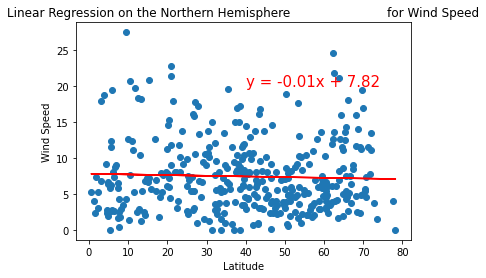

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

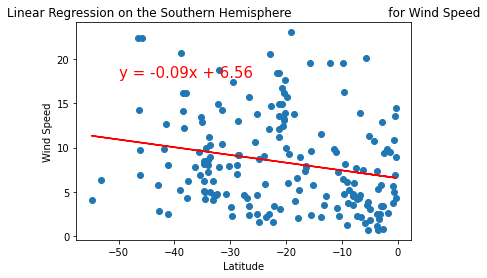

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,18))